<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Classification%20Networks/02_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass classification

more than 2 classes as an option = *multiclass classification*
  - 3 diff classes: multiclass classification
  - 100 diff classes: multiclass classification

Practice: build a neural network to classify different images of clothing

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data has already been sorted into training and test sets
# Use tuples to import data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [26]:
# Show first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [27]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

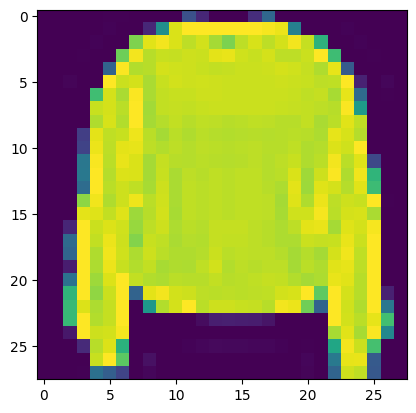

In [28]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [29]:
# Check samples label
train_labels[7]     # should return 2 = pullover

2

In [30]:
# Create a small list to index training labels so that they are words and not just numbers
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

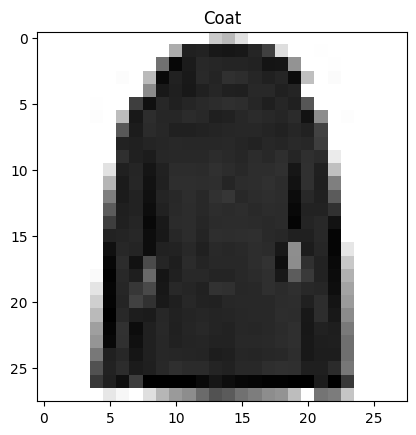

In [31]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

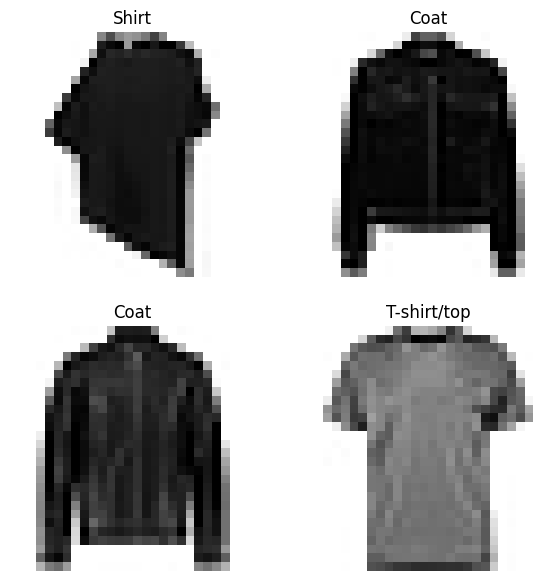

In [32]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Buidling a multi-class classification model

For multi-class classifictation model, can use similar architecture to binary classifiers, however there are a few differences:
  - input shape = 28 * 28 (shape of one image)
  - output shape = 10 (one per class of clothing)
  - loss function = tf.keras.losses.CategoricalCrossentropy
  - output layer activation = Softmax (not sigmoid)

In [33]:
# our data needs to be flattened (from (28, 28) to (None, 784))
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])
flatten_model.output_shape # 28 * 28 = 784
# neural networks like data to be in one long vector

(None, 784)

In [34]:
train_labels[:10] # training labels are as integers not one hot encoded
# Therefore categorical_crossentropy needs to be changed to sparse

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [35]:
train_labels.shape

(60000,)

In [36]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 1 per each class (10)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training



Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2456 - accuracy: 0.1823 - val_loss: 2.0382 - val_accuracy: 0.1916
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9129 - accuracy: 0.2394 - val_loss: 1.8334 - val_accuracy: 0.2280
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7302 - accuracy: 0.2944 - val_loss: 1.7035 - val_accuracy: 0.3161
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6949 - accuracy: 0.3069 - val_loss: 1.6925 - val_accuracy: 0.3295
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6167 - accuracy: 0.3274 - val_loss: 1.5318 - val_accuracy: 0.3164
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4937 - accuracy: 0.3478 - val_loss: 1.4703 - val_accuracy: 0.3517
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4315 - accuracy: 0.3712 - val_loss: 1.4055 - val_accuracy:

In [37]:
# Model summary
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Check min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in tensors they try to find patterns in b/w 0 & 1.

In [39]:
# We can get our training and testing data b/w 0 & 1 by dividing by max
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check min and max values of scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [40]:
# Set rand seed
tf.random.set_seed(42)

# Create model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1752 - accuracy: 0.6086 - val_loss: 0.8633 - val_accuracy: 0.7279
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7565 - accuracy: 0.7558 - val_loss: 0.7621 - val_accuracy: 0.7487
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6821 - accuracy: 0.7706 - val_loss: 0.7178 - val_accuracy: 0.7596
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6522 - accuracy: 0.7777 - val_loss: 0.6926 - val_accuracy: 0.7659
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6326 - accuracy: 0.7824 - val_loss: 0.6779 - val_accuracy: 0.7704
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6187 - accuracy: 0.7849 - val_loss: 0.6737 - val_accuracy: 0.7710
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6109 - accuracy: 0.7874 - val_loss: 0.6584 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

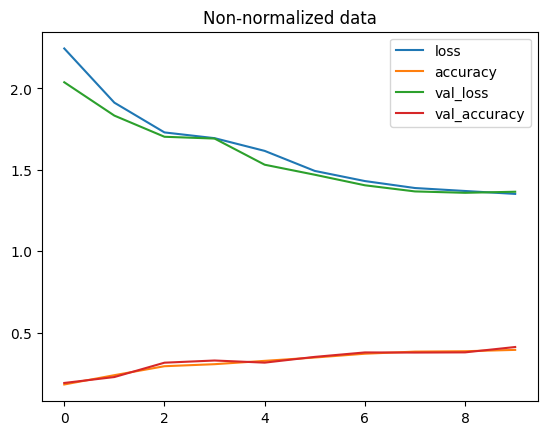

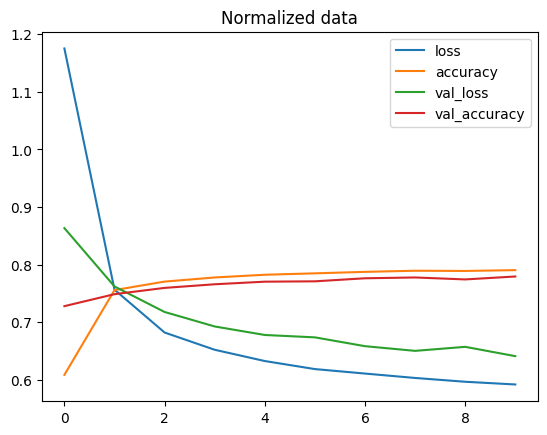

In [41]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding ideal learning rate

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2712 - accuracy: 0.4976 - val_loss: 0.8965 - val_accuracy: 0.6815 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7665 - accuracy: 0.7089 - val_loss: 0.7256 - val_accuracy: 0.7300 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6661 - accuracy: 0.7529 - val_loss: 0.6804 - val_accuracy: 0.7411 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6229 - accuracy: 0.7673 - val_loss: 0.6433 - val_accuracy: 0.7597 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5977 - accuracy: 0.7752 - val_loss: 0.6577 - val_accuracy: 0.7674 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5832 - accuracy: 0.7785 - val_loss: 0.6310 - val_accuracy: 0.7617 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'The Ideal Learning rate')

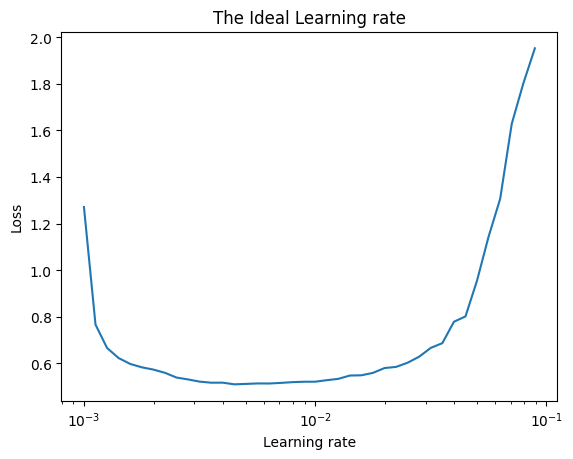

In [43]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("The Ideal Learning rate")

In [44]:
10**-3

0.001

In [45]:
# Let's refit model w/ ideal learning rate

# Set rand seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile mode
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1107 - accuracy: 0.5580 - val_loss: 0.8423 - val_accuracy: 0.6626
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7705 - accuracy: 0.7048 - val_loss: 0.7614 - val_accuracy: 0.7218
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7008 - accuracy: 0.7378 - val_loss: 0.7132 - val_accuracy: 0.7265
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6577 - accuracy: 0.7567 - val_loss: 0.6633 - val_accuracy: 0.7528
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6336 - accuracy: 0.7652 - val_loss: 0.6473 - val_accuracy: 0.7650
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6164 - accuracy: 0.7720 - val_loss: 0.6639 - val_accuracy: 0.7571
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6091 - accuracy: 0.7737 - val_loss: 0.6419 - val_accuracy: